
**Exploratory Data Analysis**


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Data handling and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation libraries
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import LabelEncoder       # For encoding categorical variables
from sklearn.preprocessing import OrdinalEncoder     # For encoding ordinal categorical variables
from sklearn.feature_selection import SelectKBest, f_regression  # For feature selection using f_regression

# Model training libraries
from sklearn.linear_model import LinearRegression    # Linear regression model
from sklearn.metrics import mean_squared_error, r2_score  # Metrics for evaluating regression models

# Metric library
from sklearn import metrics

# Setting a random seed for reproducibility
np.random.seed(1111)


In [2]:
df=pd.read_csv('/content/drive/MyDrive/MENTORNESS/SALARY PREDICTION/Salary Prediction of Data Professions.csv')
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [3]:
print("Dataset size: " + str(df.shape))

Dataset size: (2639, 13)


In [4]:
# Display general information about the DataFrame
print("Displaying general information about the DataFrame:")

# Shows the memory usage, column types, and non-null counts
df.info()


Displaying general information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB


In [5]:
# Number of NA (missing) cells for each column
print("Counting the number of NA (missing) cells for each column:")

# Calculate the number of missing values for each column
na_counts = df.isna().sum()
print(na_counts)


Counting the number of NA (missing) cells for each column:
FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64


In [6]:
# Displaying descriptive statistics for the DataFrame
print("Displaying descriptive statistics for the DataFrame:")

# Shows basic statistical details like percentile, mean, std, etc.
statistics = df.describe()

# Printing the descriptive statistics
print(statistics)


Displaying descriptive statistics for the DataFrame:
               AGE         SALARY  LEAVES USED  LEAVES REMAINING      RATINGS  \
count  2636.000000    2639.000000  2636.000000       2637.000000  2637.000000   
mean     24.756449   58136.678287    22.501517          7.503223     3.486159   
std       3.908228   36876.956944     4.604469          4.603193     1.114933   
min      21.000000   40001.000000    15.000000          0.000000     2.000000   
25%      22.000000   43418.000000    19.000000          4.000000     2.000000   
50%      24.000000   46781.000000    22.000000          8.000000     3.000000   
75%      25.000000   51401.500000    26.000000         11.000000     4.000000   
max      45.000000  388112.000000    30.000000         15.000000     5.000000   

          PAST EXP  
count  2639.000000  
mean      1.566881  
std       2.728416  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       2.000000  
max      23.000000  


Plotting histograms for each numerical column in the DataFrame:


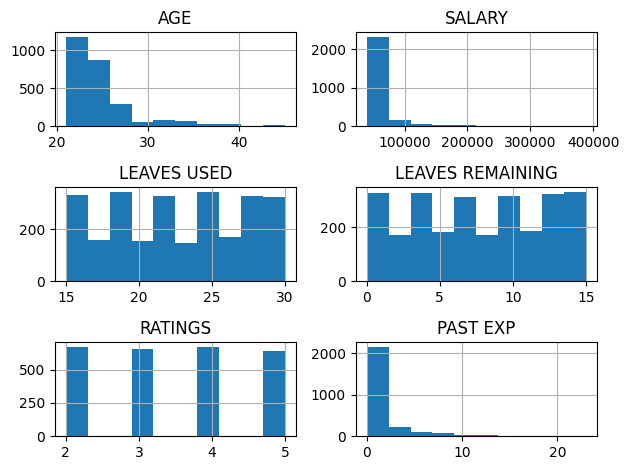

In [7]:
# Plotting histograms for numerical columns in the DataFrame
print("Plotting histograms for each numerical column in the DataFrame:")
df.hist()
plt.tight_layout()
plt.show()

In [8]:
# Identify categorical columns in the DataFrame
cat_cols = [x for x in df.columns if df[x].dtype == 'object']
print(cat_cols)

['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION', 'UNIT']


<Axes: xlabel='SEX'>

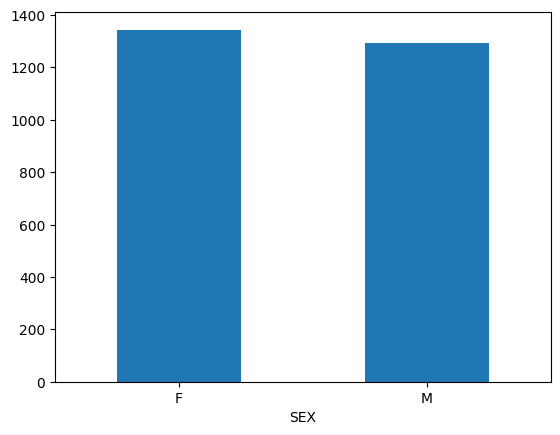

In [9]:
# Plot bar chart for the value counts of the 'SEX' column
df['SEX'].value_counts().plot(kind='bar', rot=0)  # Rotates x-axis labels for better readability


<Axes: xlabel='DESIGNATION'>

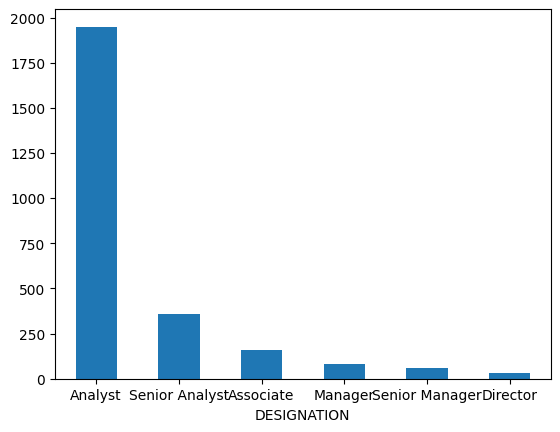

In [10]:
# Plot bar chart for the value counts of the 'DESIGNATION' column
df['DESIGNATION'].value_counts().plot(kind='bar', rot=0)  # Rotates x-axis labels for better readability


<Axes: xlabel='UNIT'>

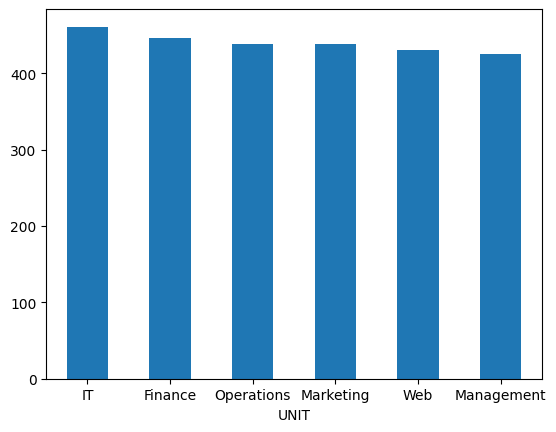

In [11]:
# Plot bar chart for the value counts of the 'UNIT' column
df['UNIT'].value_counts().plot(kind='bar', rot=0)  # Rotates x-axis labels for better readability


**Data** **Preprocessing**

In [12]:
# Imputing specified columns with their mode
# List of columns to impute with mode
cols_mode = ['DOJ', 'AGE', 'RATINGS']

# Impute each column in cols_mode with its mode
for col in cols_mode:
    mode_value = df[col].mode()[0]  # Find the mode
    df[col] = df[col].fillna(mode_value)  # Fill missing values with the mode

In [13]:
# Imputing specified columns with their median
# List of columns to impute with median
cols_median = ['LEAVES USED', 'LEAVES REMAINING']

# Impute each column in cols_median with its median
for col in cols_median:
    median_value = df[col].median()  # Calculate the median
    df[col] = df[col].fillna(median_value)  # Fill missing values with the median


In [14]:
# Dropping columns insignificant for analysis
# List of columns to drop
cols_drop = ['FIRST NAME', 'LAST NAME']

# Drop the columns
df = df.drop(columns=cols_drop)



In [15]:
# Number of NA (missing) cells for each column
print("Counting the number of NA (missing) cells for each column:")

# Calculate the number of missing values for each column
na_counts = df.isna().sum()
print(na_counts)

Counting the number of NA (missing) cells for each column:
SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64


**Feature Engineering**

In [16]:
# Converting date columns to datetime datatype
# List of date columns to convert
cols_date = ['DOJ', 'CURRENT DATE']

# Convert each column in cols_date to datetime
for col in cols_date:
    df[col] = pd.to_datetime(df[col], errors='coerce')  # Coerce errors to handle invalid dates


In [17]:
# Creating a new feature: years_experience
df['years_experience'] = df['CURRENT DATE'].dt.year - df['DOJ'].dt.year


In [18]:
# Dropping date columns
df.drop(columns=cols_date, inplace=True)


In [19]:
print("\nDataFrame after Feature Engineering:")
print(df.head())



DataFrame after Feature Engineering:
  SEX DESIGNATION   AGE  SALARY        UNIT  LEAVES USED  LEAVES REMAINING  \
0   F     Analyst  21.0   44570     Finance         24.0               6.0   
1   F   Associate  25.0   89207         Web         22.0              13.0   
2   F     Analyst  21.0   40955     Finance         23.0               7.0   
3   F     Analyst  22.0   45550          IT         22.0               8.0   
4   M     Analyst  25.0   43161  Operations         27.0               3.0   

   RATINGS  PAST EXP  years_experience  
0      2.0         0                 2  
1      4.0         7                 3  
2      3.0         0                 2  
3      3.0         0                 3  
4      4.0         3                 2  


In [20]:
# Save DataFrame to CSV in my Google Drive
df.to_csv('/content/drive/My Drive/MENTORNESS/SALARY PREDICTION/Salary_prediction_preprocessed.csv', index=False)


In [21]:
df1 = pd.read_csv('/content/drive/MyDrive/MENTORNESS/SALARY PREDICTION/Salary_prediction_preprocessed.csv')
df1.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,years_experience
0,F,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,2
1,F,Associate,25.0,89207,Web,22.0,13.0,4.0,7,3
2,F,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,2
3,F,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,3
4,M,Analyst,25.0,43161,Operations,27.0,3.0,4.0,3,2


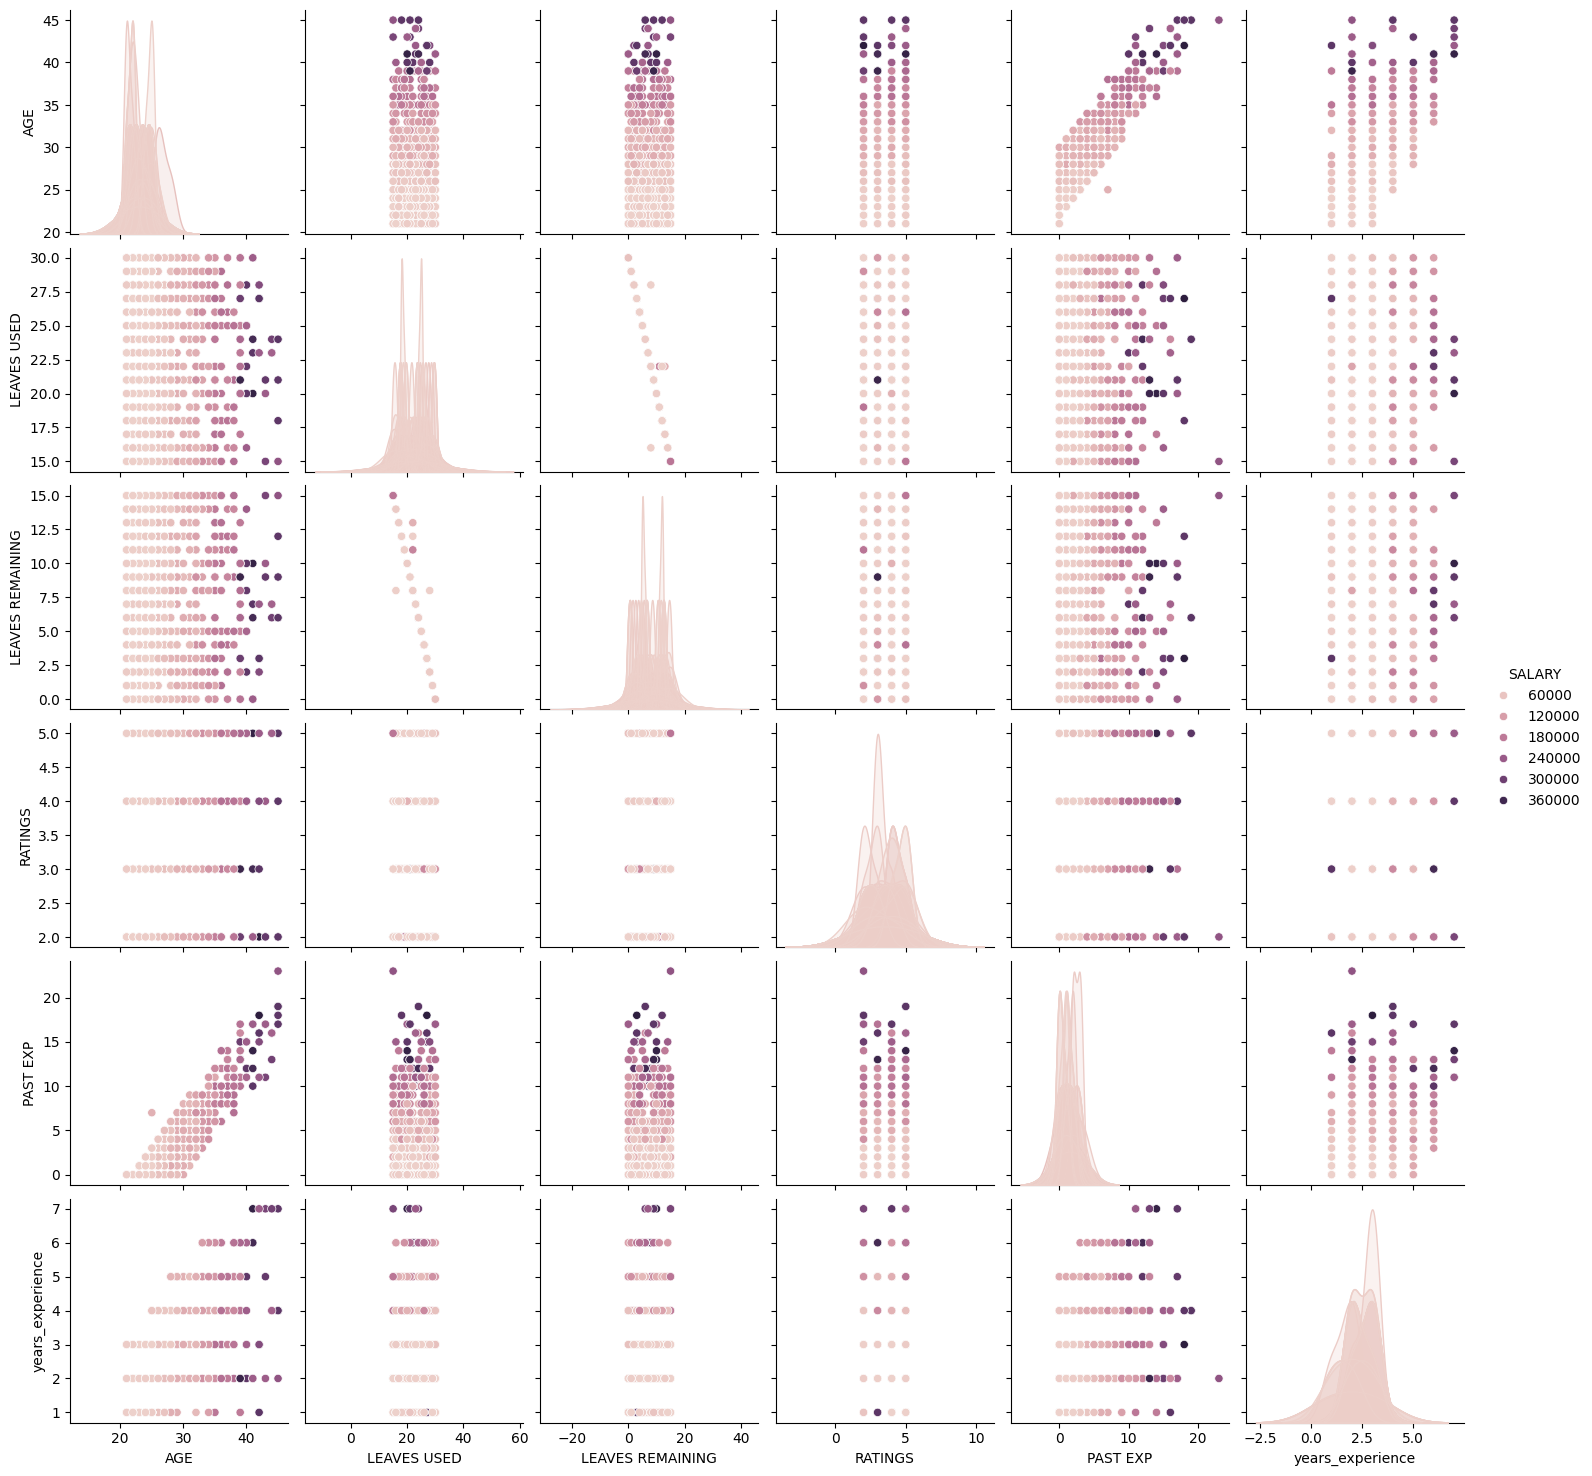

In [22]:
# Create pairplot with hue='SALARY'
sns.pairplot(df1, hue='SALARY')
plt.show()

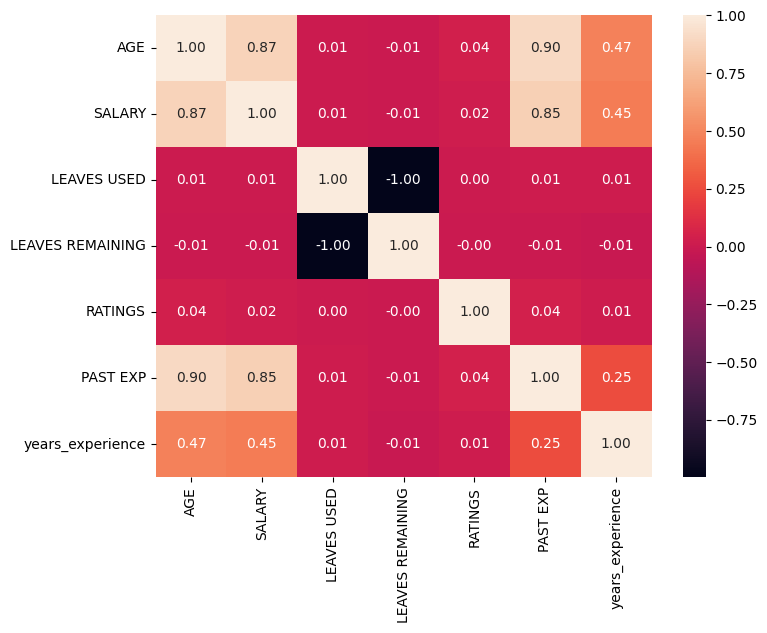

In [23]:
plt.figure(figsize=(8, 6))

# Compute the correlation matrix for numeric columns only
corr = df1.corr(numeric_only=True)

# Plot a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()


**Model Building and Evaluation**

In [24]:
# Load the dataset from Google Drive
df = pd.read_csv('/content/drive/MyDrive/MENTORNESS/SALARY PREDICTION/Salary_prediction_preprocessed.csv')


In [25]:
# Splitting the data into dependent and independent variables

# Independent variables (features)
X = df.drop('SALARY', axis=1)

# Dependent variable (target)
y = df['SALARY']

# Display the first few rows of X and y to confirm
print("Independent Variables (X):")
print(X.head())

print("\nDependent Variable (y):")
print(y.head())


Independent Variables (X):
  SEX DESIGNATION   AGE        UNIT  LEAVES USED  LEAVES REMAINING  RATINGS  \
0   F     Analyst  21.0     Finance         24.0               6.0      2.0   
1   F   Associate  25.0         Web         22.0              13.0      4.0   
2   F     Analyst  21.0     Finance         23.0               7.0      3.0   
3   F     Analyst  22.0          IT         22.0               8.0      3.0   
4   M     Analyst  25.0  Operations         27.0               3.0      4.0   

   PAST EXP  years_experience  
0         0                 2  
1         7                 3  
2         0                 2  
3         0                 3  
4         3                 2  

Dependent Variable (y):
0    44570
1    89207
2    40955
3    45550
4    43161
Name: SALARY, dtype: int64


In [26]:
# Splitting the data into training and testing sets
# 70% for training and 30% for testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111)

# Display the shape of the training and testing sets
print(f"Training set - X: {x_train.shape}, y: {y_train.shape}")
print(f"Testing set - X: {x_test.shape}, y: {y_test.shape}")


Training set - X: (1847, 9), y: (1847,)
Testing set - X: (792, 9), y: (792,)


Encoding Data

In [27]:
# Distribution of values in the 'DESIGNATION' column
designation_counts = df['DESIGNATION'].value_counts()
print(designation_counts)


DESIGNATION
Analyst           1949
Senior Analyst     356
Associate          159
Manager             81
Senior Manager      62
Director            32
Name: count, dtype: int64


In [28]:
# Distribution of values in the 'SEX' column
sex_counts = df['SEX'].value_counts()
print(sex_counts)


SEX
F    1344
M    1295
Name: count, dtype: int64


In [29]:
# Distribution of values in the 'UNIT' column
unit_counts = df['UNIT'].value_counts()
print(unit_counts)


UNIT
IT            461
Finance       446
Operations    438
Marketing     438
Web           431
Management    425
Name: count, dtype: int64


In [30]:
label_cols = ['SEX', 'UNIT']

# Initialize LabelEncoders for 'SEX' and 'UNIT'
le_sex = LabelEncoder()
le_unit = LabelEncoder()

# Fit and transform the training data and transform the test data
x_train['SEX'] = le_sex.fit_transform(x_train['SEX'])
x_test['SEX'] = le_sex.transform(x_test['SEX'])

x_train['UNIT'] = le_unit.fit_transform(x_train['UNIT'])
x_test['UNIT'] = le_unit.transform(x_test['UNIT'])

In [31]:
# Ordinal encoding for the 'DESIGNATION' column
desired_order = [['Analyst', 'Associate', 'Senior Analyst', 'Manager', 'Senior Manager', 'Director']]
ordinal_encoder = OrdinalEncoder(categories=desired_order)

x_train['DESIGNATION'] = ordinal_encoder.fit_transform(x_train[['DESIGNATION']])
x_test['DESIGNATION'] = ordinal_encoder.transform(x_test[['DESIGNATION']])


In [32]:
print(x_train.head())


      SEX  DESIGNATION   AGE  UNIT  LEAVES USED  LEAVES REMAINING  RATINGS  \
1813    0          0.0  23.0     0         24.0               6.0      4.0   
2478    1          2.0  25.0     1         16.0              14.0      2.0   
2251    0          0.0  22.0     0         18.0              12.0      2.0   
594     0          0.0  24.0     0         22.0               8.0      5.0   
1650    0          0.0  25.0     2         19.0              11.0      5.0   

      PAST EXP  years_experience  
1813         0                 2  
2478         0                 4  
2251         0                 2  
594          1                 3  
1650         2                 2  


Feature selection

In [33]:
# SelectKBest with f_regression scoring function and k=6 (select 6 best features)
selector = SelectKBest(score_func=f_regression, k=7)

# Fit and transform the selector on the training data
x_train_new = selector.fit_transform(x_train, y_train)

# Transform the testing data based on the fitted selector
x_test_new = selector.transform(x_test)

# Print the selected features
selected_features = x_train.columns[selector.get_support(indices=True)]
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['SEX', 'DESIGNATION', 'AGE', 'UNIT', 'RATINGS', 'PAST EXP',
       'years_experience'],
      dtype='object')


In [34]:
# Convert selected features to DataFrames with new column names
x_train_new = pd.DataFrame(x_train_new, columns=selected_features)
x_test_new = pd.DataFrame(x_test_new, columns=selected_features)

In [35]:
print("New Training Dataset:")
print(x_train_new.head())

print("\nNew Testing Dataset:")
print(x_test_new.head())

New Training Dataset:
   SEX  DESIGNATION   AGE  UNIT  RATINGS  PAST EXP  years_experience
0  0.0          0.0  23.0   0.0      4.0       0.0               2.0
1  1.0          2.0  25.0   1.0      2.0       0.0               4.0
2  0.0          0.0  22.0   0.0      2.0       0.0               2.0
3  0.0          0.0  24.0   0.0      5.0       1.0               3.0
4  0.0          0.0  25.0   2.0      5.0       2.0               2.0

New Testing Dataset:
   SEX  DESIGNATION   AGE  UNIT  RATINGS  PAST EXP  years_experience
0  1.0          0.0  24.0   1.0      5.0       0.0               3.0
1  0.0          4.0  37.0   2.0      4.0       9.0               5.0
2  1.0          2.0  25.0   4.0      4.0       2.0               2.0
3  1.0          0.0  23.0   0.0      2.0       1.0               2.0
4  1.0          0.0  21.0   0.0      2.0       0.0               2.0


In [36]:
def scorer(model_name, dictionary_name, y_test, pred):
    '''
    A metric scorer for regression tasks.

    Args:
    - model_name: a string representing the name of the model.
    - dictionary_name: a dictionary where the scores will be stored.
    - y_test: a pandas Series or array representing the true target values for the test set.
    - pred: a pandas Series or array representing the predicted target values for the test set.

    Returns:
    - The updated dictionary with the calculated scores stored under the model_name key.

    Calculates Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R2 score for the model,
    stores them in the provided dictionary under the key of the model name, and returns the dictionary.
    '''
    from sklearn import metrics
    import numpy as np

    scores = {
        'Mean Absolute Error': metrics.mean_absolute_error(y_test, pred),
        'Mean Squared Error': metrics.mean_squared_error(y_test, pred),
        'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, pred)),
        'R2 score': metrics.r2_score(y_test, pred)
    }

    dictionary_name[model_name] = scores

    return dictionary_name


In [37]:

# Define an empty DataFrame to store model scores
scores = pd.DataFrame()
pd.set_option('display.float_format', lambda x: '%.12f' % x)


Lasso Regression

In [38]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=2, max_iter=10000)

# Fit the model to the training data
lasso.fit(x_train_new, y_train)

# Predict on the test data
pred = lasso.predict(x_test_new)

# Evaluate the model performance and store scores
model_name = 'Lasso Regression'
scores = scorer(model_name, scores, y_test, pred)


Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)

# Fit the model to the training data
rf.fit(x_train_new, y_train)

# Predict on the test data
pred = rf.predict(x_test_new)

# Evaluate the model performance and store scores
model_name = 'Random Forest Regressor'
scores = scorer(model_name, scores, y_test, pred)


Gradient Boosting Machine

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

# Fit the model to the training data
gbr.fit(x_train_new, y_train)

# Predict on the test data
pred = gbr.predict(x_test_new)

# Evaluate the model performance and store scores
model_name = 'Gradient Boosting Regressor'
scores = scorer(model_name, scores, y_test, pred)

XGboost

In [41]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()

# Fit the model to the training data
xgb_model.fit(x_train_new, y_train)

# Predict on the test data
pred = xgb_model.predict(x_test_new)

# Evaluate the model performance and store scores
model_name = 'XGBoost Regressor'
scores = scorer(model_name, scores, y_test, pred)


In [42]:
from sklearn.svm import SVR
svr_model = SVR()

# Fit the model to the training data
svr_model.fit(x_train_new, y_train)

# Predict on the test data
pred = svr_model.predict(x_test_new)

# Evaluate the model performance and store scores
model_name = 'Support Vector Regressor'
scores = scorer(model_name, scores, y_test, pred)


K-nearest Neighbours Regression

In [43]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

# Fit the model to the training data
knn.fit(x_train_new, y_train)

# Predict on the test data
pred = knn.predict(x_test_new)

# Evaluate the model performance and store scores
model_name = 'K-Nearest Neighbors Regressor'
scores = scorer(model_name, scores, y_test, pred)


**Model Performance Analysis and Selection**

In [44]:
scores

,Lasso Regression,Random Forest Regressor,Gradient Boosting Regressor,XGBoost Regressor,Support Vector Regressor,K-Nearest Neighbors Regressor
Mean Absolute Error,9438.614044645070,4251.340989344504,4133.770058315630,4376.181546914457,14022.375996841858,4801.922222222222
Mean Squared Error,242996818.688157677650,59113352.643597111106,59711615.460116915405,72350797.213566496968,1384037065.523323774338,103259119.341616183519
Root Mean Squared Error,15588.355227161001,7688.520835869349,7727.329128496916,8505.927181299314,37202.648635860911,10161.649440008063
R2 score,0.808852365529,0.953499895248,0.953029286115,0.943086976142,-0.088719648775,0.918773683926


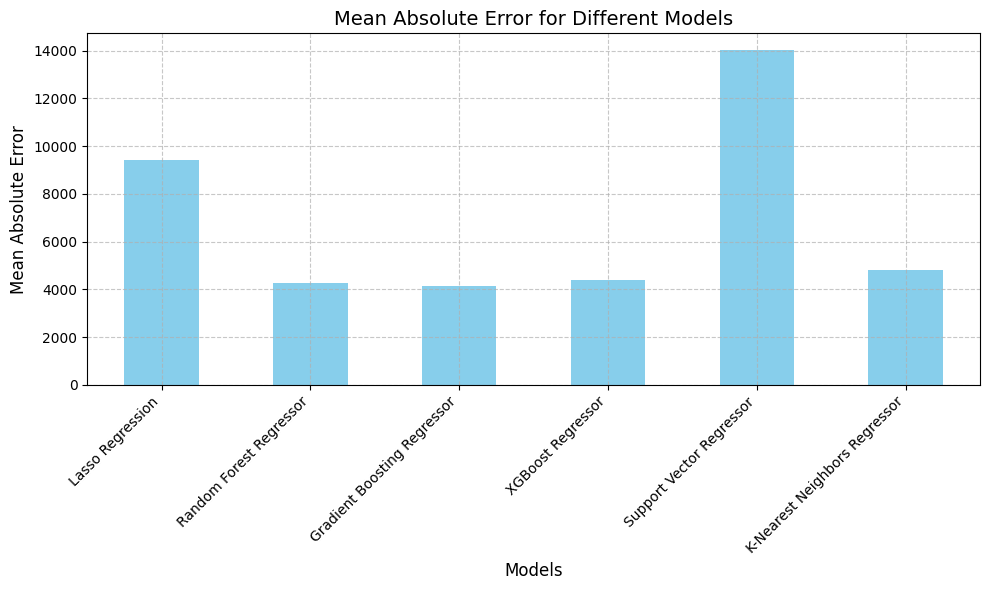

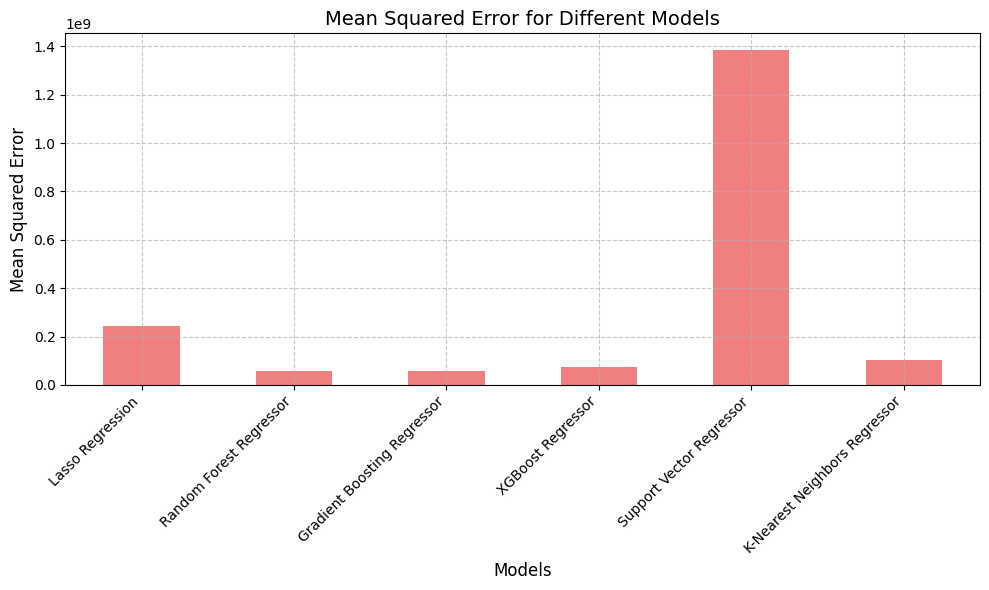

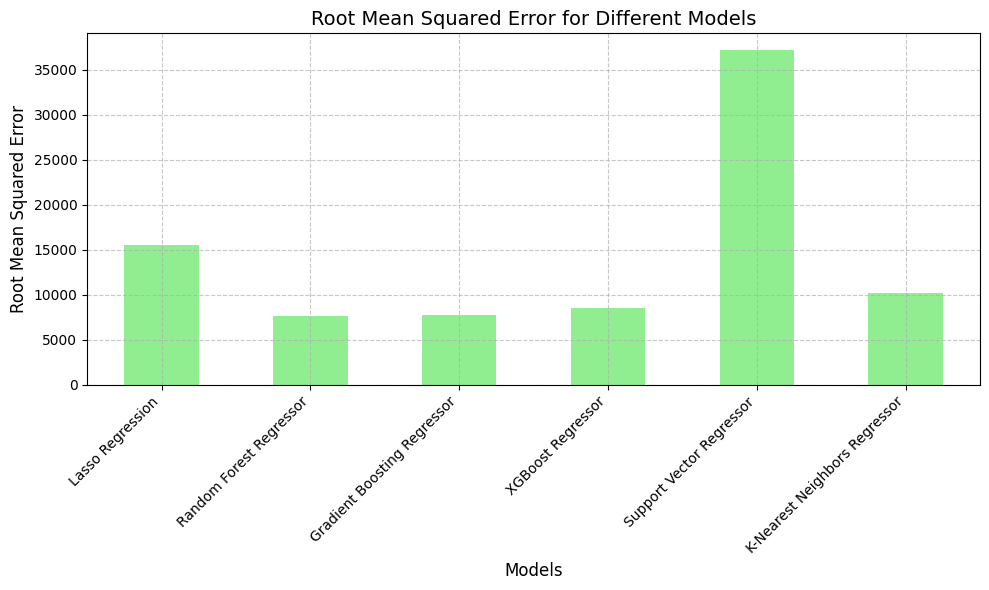

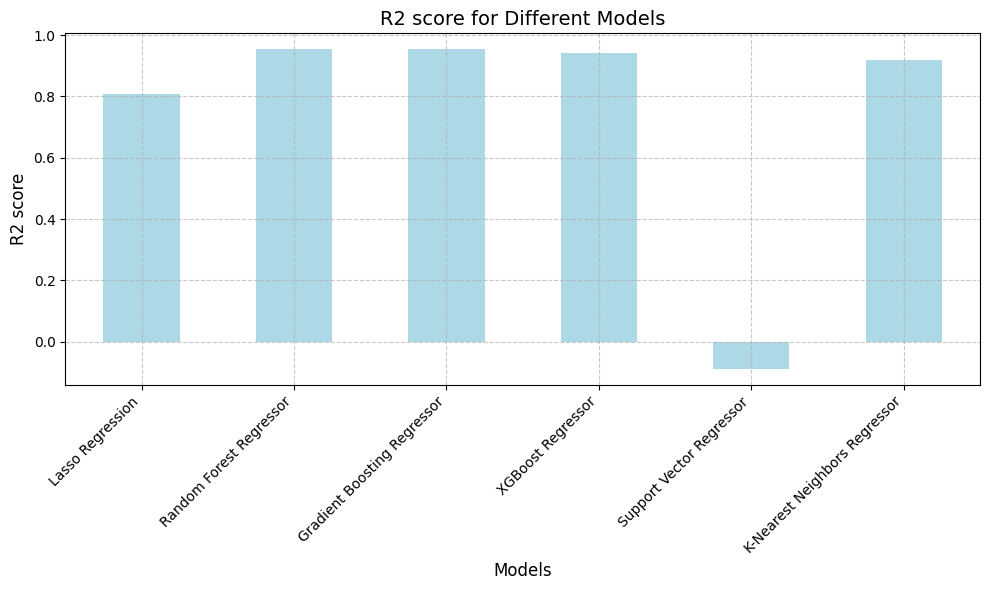

In [45]:
scores_trans= scores.T
# List of metrics to plot
metrics_list = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R2 score']

# Color list for each metric plot
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightblue']

for metric, color in zip(metrics_list, colors):
    plt.figure(figsize=(10, 6))
    scores_trans[metric].plot(kind='bar', color=color)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.title(f'{metric} for Different Models', fontsize=14)
    plt.xlabel('Models', fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


**Random Forest Regressor** is the best model for salary prediction based on its superior performance across all metrics.
<br>
1. **Lowest Errors:** Random Forest has the smallest prediction errors with MAE of 4251.34 and RMSE of 7688.52.

2.  **Lowest MSE:** It has the lowest Mean Squared Error at 59113352.64.
3. **Highest R²:** With an R² score of 0.9535, it explains 95.35% of the variance in salary.


In [46]:
import pickle
model_filename = '/content/drive/MyDrive/MENTORNESS/SALARY PREDICTION/random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(rf, file)

**ML Pipelines**

In [47]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset from Google Drive
df = pd.read_csv('/content/drive/MyDrive/MENTORNESS/SALARY PREDICTION/Salary_prediction_preprocessed.csv')

# Define the columns
ordinal_columns = ['DESIGNATION']
desired_order = [['Analyst', 'Associate', 'Senior Analyst', 'Manager', 'Senior Manager', 'Director']]
ordinal_columns_no_order = ['SEX', 'UNIT']

# Splitting the data into dependent and independent variables
X = df.drop(columns=['SALARY'])
y = df['SALARY']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Define the transformations
trans1 = ColumnTransformer(
    transformers=[
        ('ordinal-encoding-order-based', OrdinalEncoder(categories=desired_order), ordinal_columns),
        ('ordinal-encoding-no-order', OrdinalEncoder(), ordinal_columns_no_order)
    ],
    remainder='passthrough'
)

trans2 = SelectKBest(score_func=f_regression, k=7)
trans3 = RandomForestRegressor(n_estimators=100)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', trans1),
    ('feature_selection', trans2),
    ('model', trans3)
])

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111)

# Fit the pipeline
pipeline.fit(x_train, y_train)

# Predict and evaluate
pred = pipeline.predict(x_test)

# Calculate metrics
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")



Mean Absolute Error: 4212.926403122919
Mean Squared Error: 56148305.925100446
Root Mean Squared Error: 7493.217328030761
R2 Score: 0.9558322783190929


In [48]:
# Extracting the SelectKBest feature selection step from the pipeline
select_k_best = pipeline.named_steps['feature_selection']

# Extracting the names of the best features selected through SelectKBest
mask = select_k_best.get_support()
feature_names = x_train.columns
selected_features = feature_names[mask]

# Updating training and test datasets with only the selected best features
x_train_new = x_train[selected_features]
x_test_new = x_test[selected_features]

x_train_new.head()

# Creating the final pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessing', trans1),
    ('model', RandomForestRegressor(n_estimators=100))
])

# Fitting the final pipeline
final_pipeline.fit(x_train_new, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal-encoding-order-based',
                                                  OrdinalEncoder(categories=[['Analyst',
                                                                              'Associate',
                                                                              'Senior '
                                                                              'Analyst',
                                                                              'Manager',
                                                                              'Senior '
                                                                              'Manager',
                                                                              'Director']]),
                                                  ['DESIGNATION']),
                                                 ('ordinal-encoding-no-order',
                                                  OrdinalEncoder(),
                                                  ['SEX', 'UNIT'])])),
                ('model', RandomForestRegressor())])

In [49]:
# Predict and evaluate
pred = final_pipeline.predict(x_test_new)

# Calculate metrics
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, pred)
print("METRICS OF FINAL MODEL")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")

METRICS OF FINAL MODEL
Mean Absolute Error: 4229.052504402163
Mean Squared Error: 58263621.35736738
Root Mean Squared Error: 7633.061073865935
R2 Score: 0.9541683160366988


In [50]:
# Save the model
import pickle
model_filename = '/content/drive/MyDrive/MENTORNESS/SALARY PREDICTION/random_forest_model_pipeline.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(final_pipeline, file)

**Deployment**

In [ ]:
pip install ipywidgets


In [52]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import pickle
import numpy as np

# Load the trained model for interactive deployment
model_filename = '/content/drive/MyDrive/MENTORNESS/SALARY PREDICTION/random_forest_model_pipeline.pkl'
with open(model_filename, 'rb') as file:
    pipeline = pickle.load(file)

# Define features used in model
features = ['SEX', 'DESIGNATION', 'AGE', 'UNIT', 'RATINGS', 'PAST EXP', 'years_experience']

# Create input widgets for each feature
sex_input = widgets.Dropdown(
    options=['F', 'M'],
    value='F',
    description='Sex:'
)

unit_input = widgets.Dropdown(
    options=['Finance', 'IT', 'Management', 'Marketing', 'Operations', 'Web'],
    value='IT',
    description='Unit:'
)

designation_input = widgets.Dropdown(
    options=['Analyst', 'Associate', 'Senior Analyst', 'Manager', 'Senior Manager', 'Director'],  # Replace with actual options from your OrdinalEncoder
    value='Analyst',
    description='Designation:'
)

# Create numeric feature widgets
numeric_features = [col for col in features if col not in ['SEX', 'UNIT', 'DESIGNATION']]
numeric_inputs = {feature: widgets.FloatText(
    value=0.0,
    description=f"{feature}:"
) for feature in numeric_features}

# Display the widgets
display(sex_input, unit_input, designation_input)
for feature, widget in numeric_inputs.items():
    display(widget)

button = widgets.Button(description="Predict Salary")
output = widgets.Output()
display(button, output)

# Define the function to handle prediction
def predict_salary(b):
    with output:
        output.clear_output()

        # Read inputs
        sex = sex_input.value
        unit = unit_input.value
        designation = designation_input.value

        # Get numeric feature values
        numeric_values = [numeric_inputs[feature].value for feature in numeric_features]

        # Create DataFrame from inputs
        input_data = pd.DataFrame({
            'SEX': [sex],
            'DESIGNATION': [designation],
            'AGE': [numeric_values[0]],  # Assuming AGE is the first numeric feature
            'UNIT': [unit],
            'RATINGS': [numeric_values[1]],  # Assuming RATINGS is the second numeric feature
            'PAST EXP': [numeric_values[2]],  # Assuming PAST EXP is the third numeric feature
            'years_experience': [numeric_values[3]]  # Assuming years_experience is the fourth numeric feature
        })

        # Predict the salary using the loaded pipeline
        prediction = pipeline.predict(input_data)

        # Display the prediction
        print(f"Predicted Salary: ${prediction[0]:,.2f}")

# Attach the function to the button
button.on_click(predict_salary)


Dropdown(description='Sex:', options=('F', 'M'), value='F')

Dropdown(description='Unit:', index=1, options=('Finance', 'IT', 'Management', 'Marketing', 'Operations', 'Web…

Dropdown(description='Designation:', options=('Analyst', 'Associate', 'Senior Analyst', 'Manager', 'Senior Man…

FloatText(value=0.0, description='AGE:')

FloatText(value=0.0, description='RATINGS:')

FloatText(value=0.0, description='PAST EXP:')

FloatText(value=0.0, description='years_experience:')

Button(description='Predict Salary', style=ButtonStyle())

Output()